In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

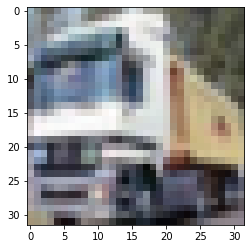

In [6]:
plt.imshow(x_train[1])

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

LETS PLOT SOME IMAGES TO SEE WHAT THEY ARE

In [10]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

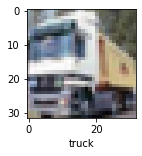

In [11]:
plot_sample(x_train, y_train, 1)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
ANN = tf.keras.models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation="relu"),
        layers.Dense(1000,activation="relu"),
        layers.Dense(10, activation="softmax")
    ]
)

In [21]:
ANN.compile(optimizer='SGD', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
ANN.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 112s 70ms/step - loss: 1.8107 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.6252 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.5436 - accuracy: 0.4548s -
Epoch 4/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.4832 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4347 - accuracy: 0.4926


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
y_pred = ANN.predict(x_test)
y_pred

array([[0.0274615 , 0.01882517, 0.17221594, ..., 0.00469116, 0.04083248,
        0.00192162],
       [0.3771121 , 0.07250158, 0.03188865, ..., 0.00808526, 0.24056427,
        0.24756917],
       [0.6414355 , 0.02878325, 0.0293668 , ..., 0.00809404, 0.23218685,
        0.0446943 ],
       ...,
       [0.00193736, 0.00100907, 0.12807211, ..., 0.03822931, 0.01095057,
        0.00280487],
       [0.03260972, 0.00647843, 0.14254496, ..., 0.03956543, 0.00422027,
        0.00611751],
       [0.04342519, 0.00446851, 0.18421029, ..., 0.3860516 , 0.00648206,
        0.00788265]], dtype=float32)

In [27]:
y_pred_classes = [np.argmax(i) for i in y_pred]
y_pred_classes

[6,
 0,
 0,
 0,
 4,
 6,
 3,
 6,
 2,
 1,
 8,
 9,
 5,
 7,
 1,
 2,
 5,
 4,
 8,
 6,
 4,
 2,
 0,
 9,
 4,
 6,
 6,
 2,
 1,
 6,
 6,
 4,
 4,
 5,
 9,
 7,
 2,
 9,
 3,
 5,
 0,
 6,
 7,
 5,
 0,
 0,
 5,
 8,
 4,
 4,
 9,
 4,
 6,
 3,
 8,
 0,
 5,
 6,
 5,
 2,
 7,
 3,
 7,
 9,
 2,
 2,
 1,
 2,
 5,
 7,
 2,
 5,
 0,
 8,
 0,
 2,
 9,
 5,
 3,
 8,
 0,
 1,
 2,
 2,
 2,
 7,
 2,
 0,
 0,
 0,
 0,
 4,
 8,
 6,
 4,
 5,
 4,
 0,
 2,
 7,
 5,
 4,
 6,
 3,
 1,
 1,
 5,
 6,
 5,
 5,
 4,
 2,
 6,
 4,
 9,
 5,
 0,
 7,
 2,
 5,
 0,
 4,
 2,
 2,
 0,
 2,
 8,
 5,
 3,
 0,
 4,
 0,
 8,
 9,
 1,
 2,
 9,
 7,
 6,
 8,
 2,
 0,
 6,
 5,
 2,
 2,
 6,
 5,
 5,
 5,
 4,
 2,
 8,
 8,
 0,
 5,
 2,
 8,
 5,
 0,
 2,
 7,
 5,
 6,
 0,
 7,
 8,
 6,
 7,
 0,
 0,
 7,
 0,
 8,
 7,
 9,
 8,
 7,
 5,
 0,
 0,
 7,
 6,
 2,
 5,
 8,
 6,
 2,
 7,
 0,
 2,
 5,
 2,
 5,
 7,
 4,
 8,
 2,
 7,
 5,
 5,
 0,
 0,
 2,
 1,
 5,
 0,
 4,
 7,
 0,
 2,
 1,
 0,
 7,
 2,
 2,
 4,
 9,
 0,
 4,
 7,
 6,
 8,
 6,
 3,
 7,
 3,
 2,
 2,
 2,
 5,
 1,
 7,
 0,
 0,
 0,
 4,
 0,
 6,
 5,
 1,
 2,
 7,
 0,
 0,
 5,
 7,
 0,
 2,
 1,


In [28]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

Text(69.0, 0.5, 'y_true')

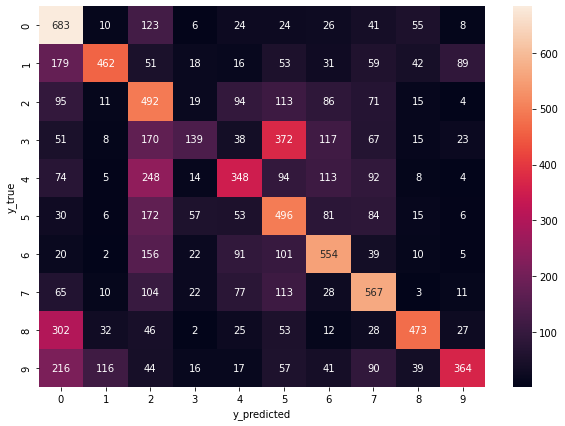

In [35]:
import seaborn as sn
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_true=[classes[i] for i in y_test], y_pred=[classes[i] for i in y_pred_classes], labels=classes)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('y_predicted')
plt.ylabel('y_true')

NOW LETS BUILD A CONVOLUTIONAL NEURAL NETWORK TO TRAIN OUR IMAGES

In [36]:
CNN = tf.keras.models.Sequential(
    [
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ]
)

In [39]:
CNN.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [40]:
CNN.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 37ms/step - loss: 1.4441 - accuracy: 0.4816
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0998 - accuracy: 0.6135
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9756 - accuracy: 0.6600
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8916 - accuracy: 0.6907
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8186 - accuracy: 0.7144
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7627 - accuracy: 0.7334
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7067 - accuracy: 0.7540
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6574 - accuracy: 0.7702
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6112 - accuracy: 0.7873
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [41]:
CNN.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9349 - accuracy: 0.7011


[0.9349457025527954, 0.7010999917984009]

In [42]:
y_pred_CNN = CNN.predict(x_test)

In [48]:
y_pred_CNN_classes = [np.argmax(i) for i in y_pred_CNN]
y_pred_CNN_classes[:5]

[3, 8, 8, 0, 4]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

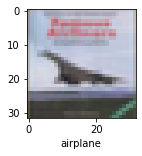

In [45]:
plot_sample(x_test, y_test, 3)

In [46]:
classes[y_pred_CNN_classes[3]]

'airplane'